# Python operations

In [40]:
# Initial code from the lab instructions
a1=1; a2=2;
u1=5; u2=4;
f=[a1*u1*u2, a2*u1/u2]
print(f)

[20, 2.5]


In [41]:
# Modifying it to change the results
# Expecting output (40, 2.5) by only changing a1 to 2
a1=2
f=[a1*u1*u2, a2*u1/u2]
print(f)

[40, 2.5]


In [42]:
# Initial code from the lab instructions
b1=4; b2=1;
v1=-2; v2=3;
g=[1/(1+b1*v1**2), 1/(1+b2*v2**2)]
print(g)

[0.058823529411764705, 0.1]


In [43]:
# Modifying b2 to 1
# Expecting output to change so that the second element 
# in the ouput vector is smaller than before
b2=2
g=[1/(1+b1*v1**2), 1/(1+b2*v2**2)]
print(g)

[0.058823529411764705, 0.05263157894736842]


In [44]:
# Matrices
ua=[[5,4],[1,2]]
print(ua)
print(ua[0][1])

[[5, 4], [1, 2]]
4


In [45]:
# Creating a 3x3 identity matrix just to try out matrices a bit more
I = [[1, 0], [0, 1]]
# Check the diagonals
print(I[0][0], I[1][1])

1 1


### Comment:
Having tried out some of the basic python functions, I can tell that they're a bit limited. Because of this, we are going to download the library NumPy.

# NumPy

In [46]:
# Importing numpy
import numpy as np

print('pi is', np.pi)
print('cos(pi) is', np.cos(np.pi))

pi is 3.141592653589793
cos(pi) is -1.0


In [47]:
# Importing specific parts of numpy
from numpy import cos, pi
print('cos(pi) is', cos(pi))

cos(pi) is -1.0


In [48]:
# Trying some more numpy functions
print(np.mod(2, 5)) # 2 % 5
print(np.cos(2*pi)) # Cosine of a circle
print(np.arcsin(1)) # Inverse sine function

2
1.0
1.5707963267948966


In [49]:
# More complicated function
c1=1; c2=2;
w1=5; w2=4;
h=np.exp(-c1*w1-c2*w2)
print(h)

2.2603294069810542e-06


### Comment:
NumPy is a very useful library with all kinds of mathematical operations included. Two more useful packages for dealing with data are matplotlib and pandas. I'm going to import them just because I want to use their functions for the last task.

In [50]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt
import pandas as pd

# Defining functions

In [51]:
# Example function for string manipulation
def process_string(str):
    t = str.strip()
    return t[0].upper()+t[1:]

In [52]:
# Testing the function
test_string = "   hello there"
string_mod = process_string(test_string)
print('Original string: ', test_string)
print('String modified by the function: ', string_mod)

Original string:     hello there
String modified by the function:  Hello there


In [53]:
# Function relating to Topic 2 in Discussion 1
def f(u,a):
    a1=a[0]; a2=a[1]; u1 = u[0]; u2=u[1]
    return [a1*u1*u2, a2*u1/u2]

In [54]:
# Applying the function
print(ua)
u=ua[0]; a=ua[1]
print(f(u,a))

[[5, 4], [1, 2]]
[20, 2.5]


### Comment:
Functions are very useful to be able to repeat calculations without to much redundant code. Furthermore, we've clearly found a neat way to deal with input vectors and output vectors for functions. This will come in very handy for the rest of the course.

# Task 1

In [55]:
# Creating the mean vector (parameter mu)
mu = [2, -3]

# Creating a diagonal covariance matrix (parameter sigma)
Sigma = [[1, 0], [0, 10]]

# Creating X (generating 500 data from the specified distribution)
X = np.random.multivariate_normal(mu, Sigma, 500)

# Checking the shape and top of the X matrix
print(X.shape)
print(X[0:4,:])

# Calulating the mean for each column (each x)
print([sum(X[:,1]/500), sum(X[:,0])/500])

# Utilizing the mean function from numpy, which correspond to our ML estimator of mu
barX = np.mean(X, axis = 0)
print(barX)

# Calculating and checking the covariance matrix
S = np.cov(np.transpose(X))

(500, 2)
[[ 0.77698272 -0.6151756 ]
 [ 0.98345104 -2.58260643]
 [ 1.33928762  0.08026372]
 [ 0.89248313 -0.91811822]]
[-2.9462629435066017, 2.098009191072907]
[ 2.09800919 -2.94626294]


(500,)
[-4.02142461 -3.51456637 -3.68184126 -3.81917801]
-2004.1677980182512


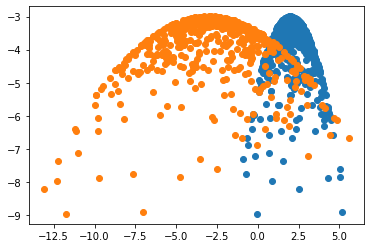

In [56]:
from scipy.stats import multivariate_normal

# Evaluating the probability density function for the values in X
# and then taking the log of that calculation
ll = np.log(multivariate_normal.pdf(X, mean = mu, cov = Sigma))

print(ll.shape)
print(ll[0:4])

# Finally summing over the pdf values
y = np.sum(ll)
print(y)

# Plotting Z against the log-likehood to see more clearly 
# where they are maximized
plt.plot(X, ll, 'o')
plt.show()

In [57]:
# Create dataframe
df = pd.DataFrame()
df['mu1'] = X[:,0]
df['mu2'] = X[:,1]
df['ll'] = ll

In [58]:
# Find max log likelihood of mu1
df['mu1'].loc[df['ll'].idxmax()]

1.9870456353939288

In [59]:
# Finding max log likehood of mu2
df['mu2'].loc[df['ll'].idxmax()]

-2.8700511544230665

-2000.8724035570092


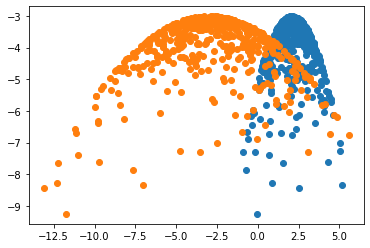

In [60]:
# Same procedure with our point estimators
hatll = np.log(multivariate_normal.pdf(X, mean = barX, cov = S))
haty = np.sum(hatll)
print(haty)

plt.plot(X, hatll, 'o')
plt.show()

In [61]:
# Finding mu1 and mu2 again
df = pd.DataFrame()
df['mu1'] = X[:,0]
df['mu2'] = X[:,1]
df['hatll'] = hatll

print(df['mu1'].loc[df['hatll'].idxmax()])
print(df['mu2'].loc[df['hatll'].idxmax()])

2.190652367485471
-2.827405571387965


*Comment*:
Like we can see above, the ML estimator is very good - close to the real parameters. 

## Grader box: 

In what follows the grader will put the values according the following check list:

* 1 Have all commands included in a raw notebook been evaluated? (0 or 0.5pt)
* 2 Have all commands been experimented with? (0 or 0.5pt)
* 3 Have all experiments been briefly commented? (0 or 0.5pt)
* 4 Have all tasks been attempted? (0, 0.5, or 1pt)
* 5 How many of the tasks have been completed? (0, 0.5, or 1pt)
* 6 How many of the tasks (completed or not) have been commented? (0, 0.5, or 1pt)
* 7 Have been the conclusions from performing the tasks clearly stated? (0, 0.5, or 1pt)
* 8 Have been the overall organization of the submitted Lab notebook been neat and easy to follow by the grader? (0, or 0.5pt) 


#### 1 Have all commands included in a raw notebook been evaluated? (0 or 0.5pt)

In [ ]:
Gr1=0

#### Grader's comment (if desired): 
N/A

#### 2 Have all commands been experimented with? (0 or 0.5pt)

In [ ]:
Gr2=0

#### Grader's comment (if desired): 
N/A

#### 3 Have all experiments been briefly commented? (0 or 0.5pt)

In [ ]:
Gr3=0

#### Grader's comment (if desired): 
N/A

#### 4 Have all tasks been attempted? (0, 0.5, or 1pt)

In [ ]:
Gr4=0

#### Grader's comment (if desired): 
N/A

#### 5 How many of the tasks have been completed? (0, 0.5, or 1pt)

In [ ]:
Gr5=0

#### Grader's comment (if desired): 
N/A

#### 6 How many of the tasks (completed or not) have been commented? (0, 0.5, or 1pt)

In [ ]:
Gr6=0

#### Grader's comment (if desired): 
N/A

#### 7 Have been the conclusions from performing the tasks clearly stated? (0, 0.5, or 1pt)

In [ ]:
Gr7=0

#### Grader's comment (if desired): 
N/A

#### 8 Have been the overall organization of the submitted Lab notebook been neat and easy to follow by the grader? (0, or 0.5pt)

In [ ]:
Gr8=0

#### Grader's comment (if desired): 
N/A

### Overall score

In [ ]:
Gr1+Gr2+Gr3+Gr4+Gr5+Gr6+Gr7+Gr8

### Score and grader's comment (if desired): 
N/A